In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../course_notebooks/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
x=df.drop('sales',axis=1)
y=df['sales']

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [6]:
#polynomial_converter.fit(x)

In [7]:
#poly_features=polynomial_converter.transform(x)
poly_features=polynomial_converter.fit_transform(x)

In [8]:
x.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [9]:
poly_features[0]


array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=.33,random_state=101)

In [12]:
x_train

array([[1.87800e+02, 2.11000e+01, 9.50000e+00, ..., 4.45210e+02,
        2.00450e+02, 9.02500e+01],
       [7.82000e+01, 4.68000e+01, 3.45000e+01, ..., 2.19024e+03,
        1.61460e+03, 1.19025e+03],
       [1.25700e+02, 3.69000e+01, 7.92000e+01, ..., 1.36161e+03,
        2.92248e+03, 6.27264e+03],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train,y_train)


LinearRegression()

In [16]:
test_predictions=model.predict(x_test)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
mae=mean_absolute_error(y_test,test_predictions)
mse=mean_squared_error(y_test,test_predictions)

In [19]:
rmse=np.sqrt(mse)

In [20]:
print(mae)
print(mse)
print(rmse)

0.48428105352155926
0.42028148421570083
0.6482912032533689


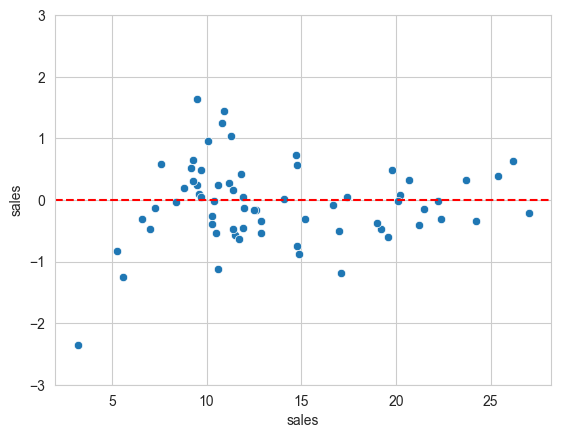

In [21]:
test_residuals = y_test - test_predictions
plt.ylim([-3,3])
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')


In [43]:
train_rmse = []
test_rmse = []
for degree in range(1,10):
    poly_converter=PolynomialFeatures(degree=degree,include_bias=False)
    poly_feat=poly_converter.fit_transform(x)
    x_tr,x_te,y_tr,y_te=train_test_split(poly_feat,y,test_size=.3,random_state=101)
    poly_model=LinearRegression()
    poly_model.fit(x_tr,y_tr)
    poly_train_predictions=poly_model.predict(x_tr)
    poly_test_predictions=poly_model.predict(x_te)
    tr_rmse=np.sqrt(mean_squared_error(y_tr,poly_train_predictions))
    te_rmse=np.sqrt(mean_squared_error(y_te,poly_test_predictions))
    train_rmse=np.append(train_rmse,tr_rmse)
    test_rmse=np.append(test_rmse,te_rmse)


[1.73459412 0.58795741 0.43393444 0.35170837 0.2509343  0.19569567
 5.42176758 0.14717468 0.1768391 ]
[1.51615194e+00 6.64643176e-01 5.80328683e-01 5.07774264e-01
 2.57582523e+00 4.25811145e+00 1.37898337e+03 4.12352224e+03
 9.56265590e+04]


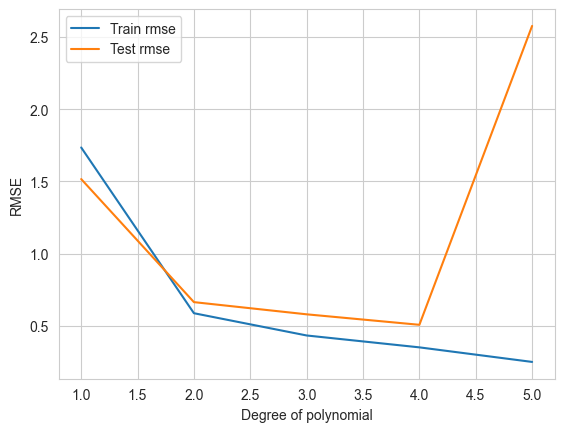

In [58]:
print(train_rmse)
print(test_rmse)
plt.ylabel('RMSE')
plt.xlabel('Degree of polynomial')
plt.plot(range(1,6),train_rmse[:5],label='Train rmse')
plt.plot(range(1,6),test_rmse[:5],label='Test rmse')
plt.legend()

[1.73459412 0.58795741 0.43393444 0.35170837 0.2509343  0.19569567
 5.42176758 0.14717468 0.1768391 ]
[1.51615194e+00 6.64643176e-01 5.80328683e-01 5.07774264e-01
 2.57582523e+00 4.25811145e+00 1.37898337e+03 4.12352224e+03
 9.56265590e+04]


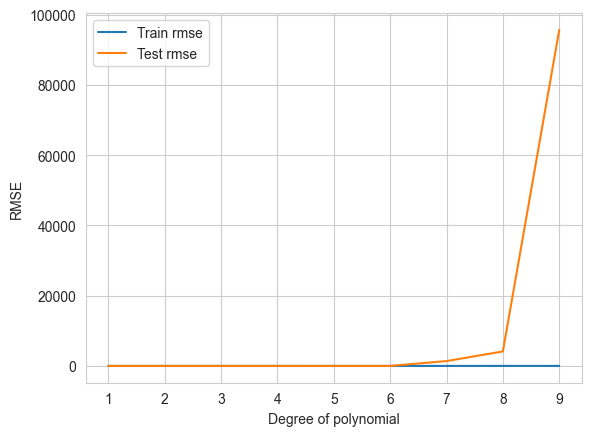

In [60]:
print(train_rmse)
print(test_rmse)
plt.ylabel('RMSE')
plt.xlabel('Degree of polynomial')
plt.plot(range(1,10),train_rmse,label='Train rmse')
plt.plot(range(1,10),test_rmse,label='Test rmse')
plt.legend()


In [61]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [62]:
final_model=LinearRegression()

In [64]:
full_converted_x=final_poly_converter.fit_transform(x)
final_model.fit(full_converted_x,y)

LinearRegression()

In [65]:
from joblib import dump,load

In [66]:
dump(final_model,'final_polynomial_model.joblib')
dump(final_poly_converter,'final_polynomial_converter.joblib')

['final_polynomial_converter.joblib']

In [67]:
c=load('final_polynomial_converter.joblib')
m=load('final_polynomial_model.joblib')

In [68]:
campaign=[[149,22,12]]
converted_campaign=c.fit_transform(campaign)
converted_campaign

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [69]:
m.predict(converted_campaign)


array([14.64501014])